In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import numpy as np

In [2]:
path = "LANRES_85_13_RMSP_CEM.csv"

In [16]:
def plot_hist_variaveis(conjunto, dataframe, i=0):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(30,90))
    fig.subplots_adjust(hspace=0.8, wspace=0.3)

    for var in conjunto:
        ax = fig.add_subplot(total_plots, 2, i+1)

        sns.histplot(x=dataframe[var], ax=ax, color='#435058')
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')
        i += 1

def plot_violin_variaveis(conjunto, dataframe,resposta, i=0):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(30,90))
    fig.subplots_adjust(hspace=0.2, wspace=0.3)

    for var in conjunto:
        ax = fig.add_subplot(total_plots, 2, i+1)

        sns.boxplot(x=dataframe[var], ax=ax, y=dataframe[resposta], color='#435058')
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')
        plt.xticks(rotation=90)
        #plt.show()
        i += 1



In [3]:
df = pd.read_csv(path, delimiter=';', decimal=',')

C:\Users\orise\AppData\Local\Temp/ipykernel_13492/3901793542.py:1: DtypeWarning: Columns (13,60,61,62,66,67,68,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=';', decimal=',')


In [5]:
df = df.drop(['ID', 'NOME_EMP','CEP','SETOR', 'QUADRA', 'LOTE', 'COD_EMP', 'ENDERECOCO', 'LOGRADOURO', 'TIT_VIA', 'NUM','CEP_4DIG', 'ENGENHEIRO', 'ARQUITETO', 'HOTELARIA', 'INCOPORADO'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TIPO_EMP    16935 non-null  object 
 1   MES_LAN     16935 non-null  object 
 2   ANO_LAN     16935 non-null  int64  
 3   DATA_ENT    16935 non-null  object 
 4   DIST        13234 non-null  object 
 5   SUBPREF     13234 non-null  object 
 6   MUNICIPIO   16935 non-null  object 
 7   TIPO_VIA    16929 non-null  object 
 8   ZONA        16935 non-null  object 
 9   DORM_UNID   16935 non-null  int64  
 10  BANH_UNID   16935 non-null  int64  
 11  GAR_UNID    16935 non-null  int64  
 12  ELEV        16935 non-null  int64  
 13  COB         16935 non-null  int64  
 14  BLOCOS      16935 non-null  int64  
 15  UNIDAND     16935 non-null  int64  
 16  ANDARES     16935 non-null  int64  
 17  AR_UT_UNID  16935 non-null  float64
 18  AR_TT_UNID  16935 non-null  float64
 19  AR_TT_TERR  16935 non-nul

In [6]:
remover = []
for col in df.columns:
    for nome in ['INCORPOR_', 'VENDEDOR', 'CONSTRUT_']:
        remover.append(col) if nome in col and col != ('INCORPOR_A' or 'CONSTRUT_A') else None

#por algum motivo uma variável a mais entrou na lista de remoção, vou remover na mão e depois checo o porquê disso
remover.remove('CONSTRUT_A')
df = df.drop(remover, axis=1)

In [7]:
df[['DIST', 'SUBPREF']] = df[['DIST', 'SUBPREF']].fillna('FORA-SP')

In [8]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int8')
    elif df[col].dtype == 'float64':
        df[col] = df[col].astype('float16')
    elif df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TIPO_EMP    16935 non-null  category
 1   MES_LAN     16935 non-null  category
 2   ANO_LAN     16935 non-null  int8    
 3   DATA_ENT    16935 non-null  category
 4   DIST        16935 non-null  category
 5   SUBPREF     16935 non-null  category
 6   MUNICIPIO   16935 non-null  category
 7   TIPO_VIA    16929 non-null  category
 8   ZONA        16935 non-null  category
 9   DORM_UNID   16935 non-null  int8    
 10  BANH_UNID   16935 non-null  int8    
 11  GAR_UNID    16935 non-null  int8    
 12  ELEV        16935 non-null  int8    
 13  COB         16935 non-null  int8    
 14  BLOCOS      16935 non-null  int8    
 15  UNIDAND     16935 non-null  int8    
 16  ANDARES     16935 non-null  int8    
 17  AR_UT_UNID  16935 non-null  float16 
 18  AR_TT_UNID  16935 non-null  float16 
 19  AR_T

In [10]:
v_resposta = "PC_M2_AT_U"
v_numericos = df.select_dtypes(include=["int8", "float16"]).columns.to_list()
v_numericos.remove(v_resposta)
v_categoricos = ['TIPO_EMP', 'DIST', 'SUBPREF', 'MUNICIPIO', 'TIPO_VIA', 'ZONA', 'SIST_FINAN', 'AGENTE']
#df.select_dtypes(include="category").columns.to_list()
v_datas = ['MES_LAN', 'DATA_ENT']
#v_categoricos.remove('MES_LAN') 
#v_categoricos.remove('DATA_ENT') 

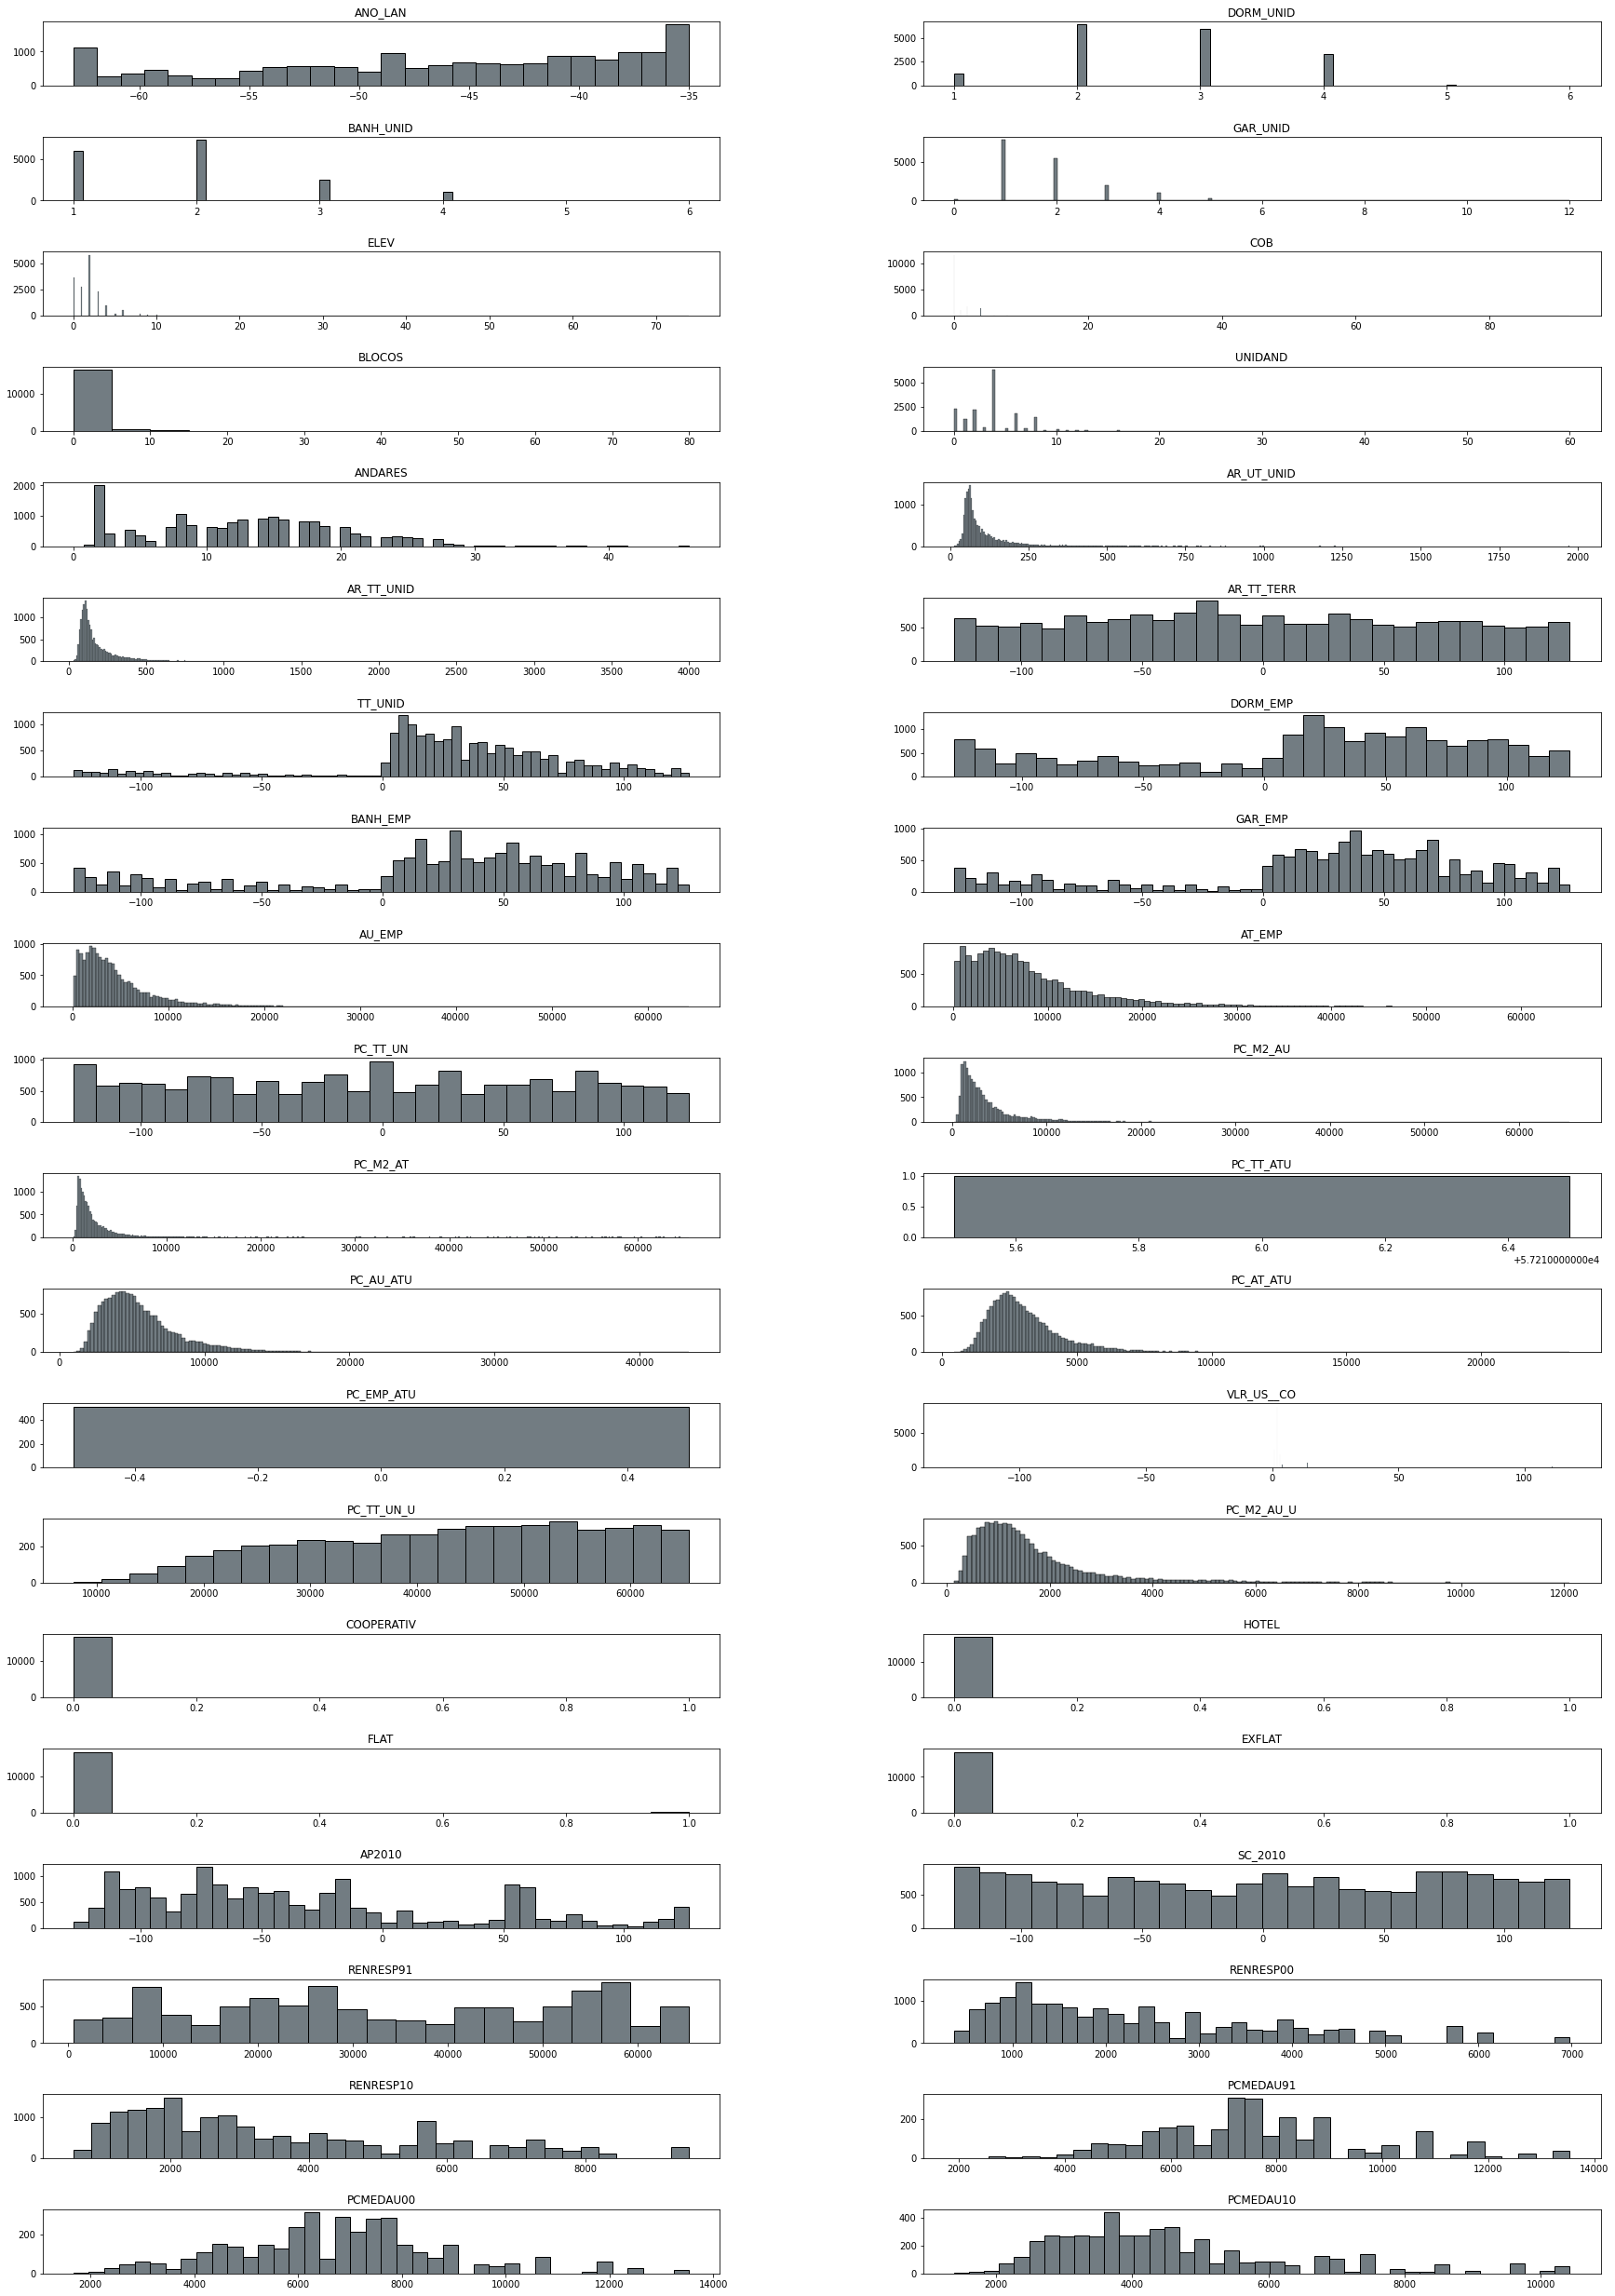

In [17]:
plot_hist_variaveis(v_numericos, df)

In [11]:
df[v_categoricos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16935 entries, 0 to 16934
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TIPO_EMP    16935 non-null  category
 1   DIST        16935 non-null  category
 2   SUBPREF     16935 non-null  category
 3   MUNICIPIO   16935 non-null  category
 4   TIPO_VIA    16929 non-null  category
 5   ZONA        16935 non-null  category
 6   SIST_FINAN  16935 non-null  category
 7   AGENTE      8877 non-null   category
dtypes: category(8)
memory usage: 144.1 KB


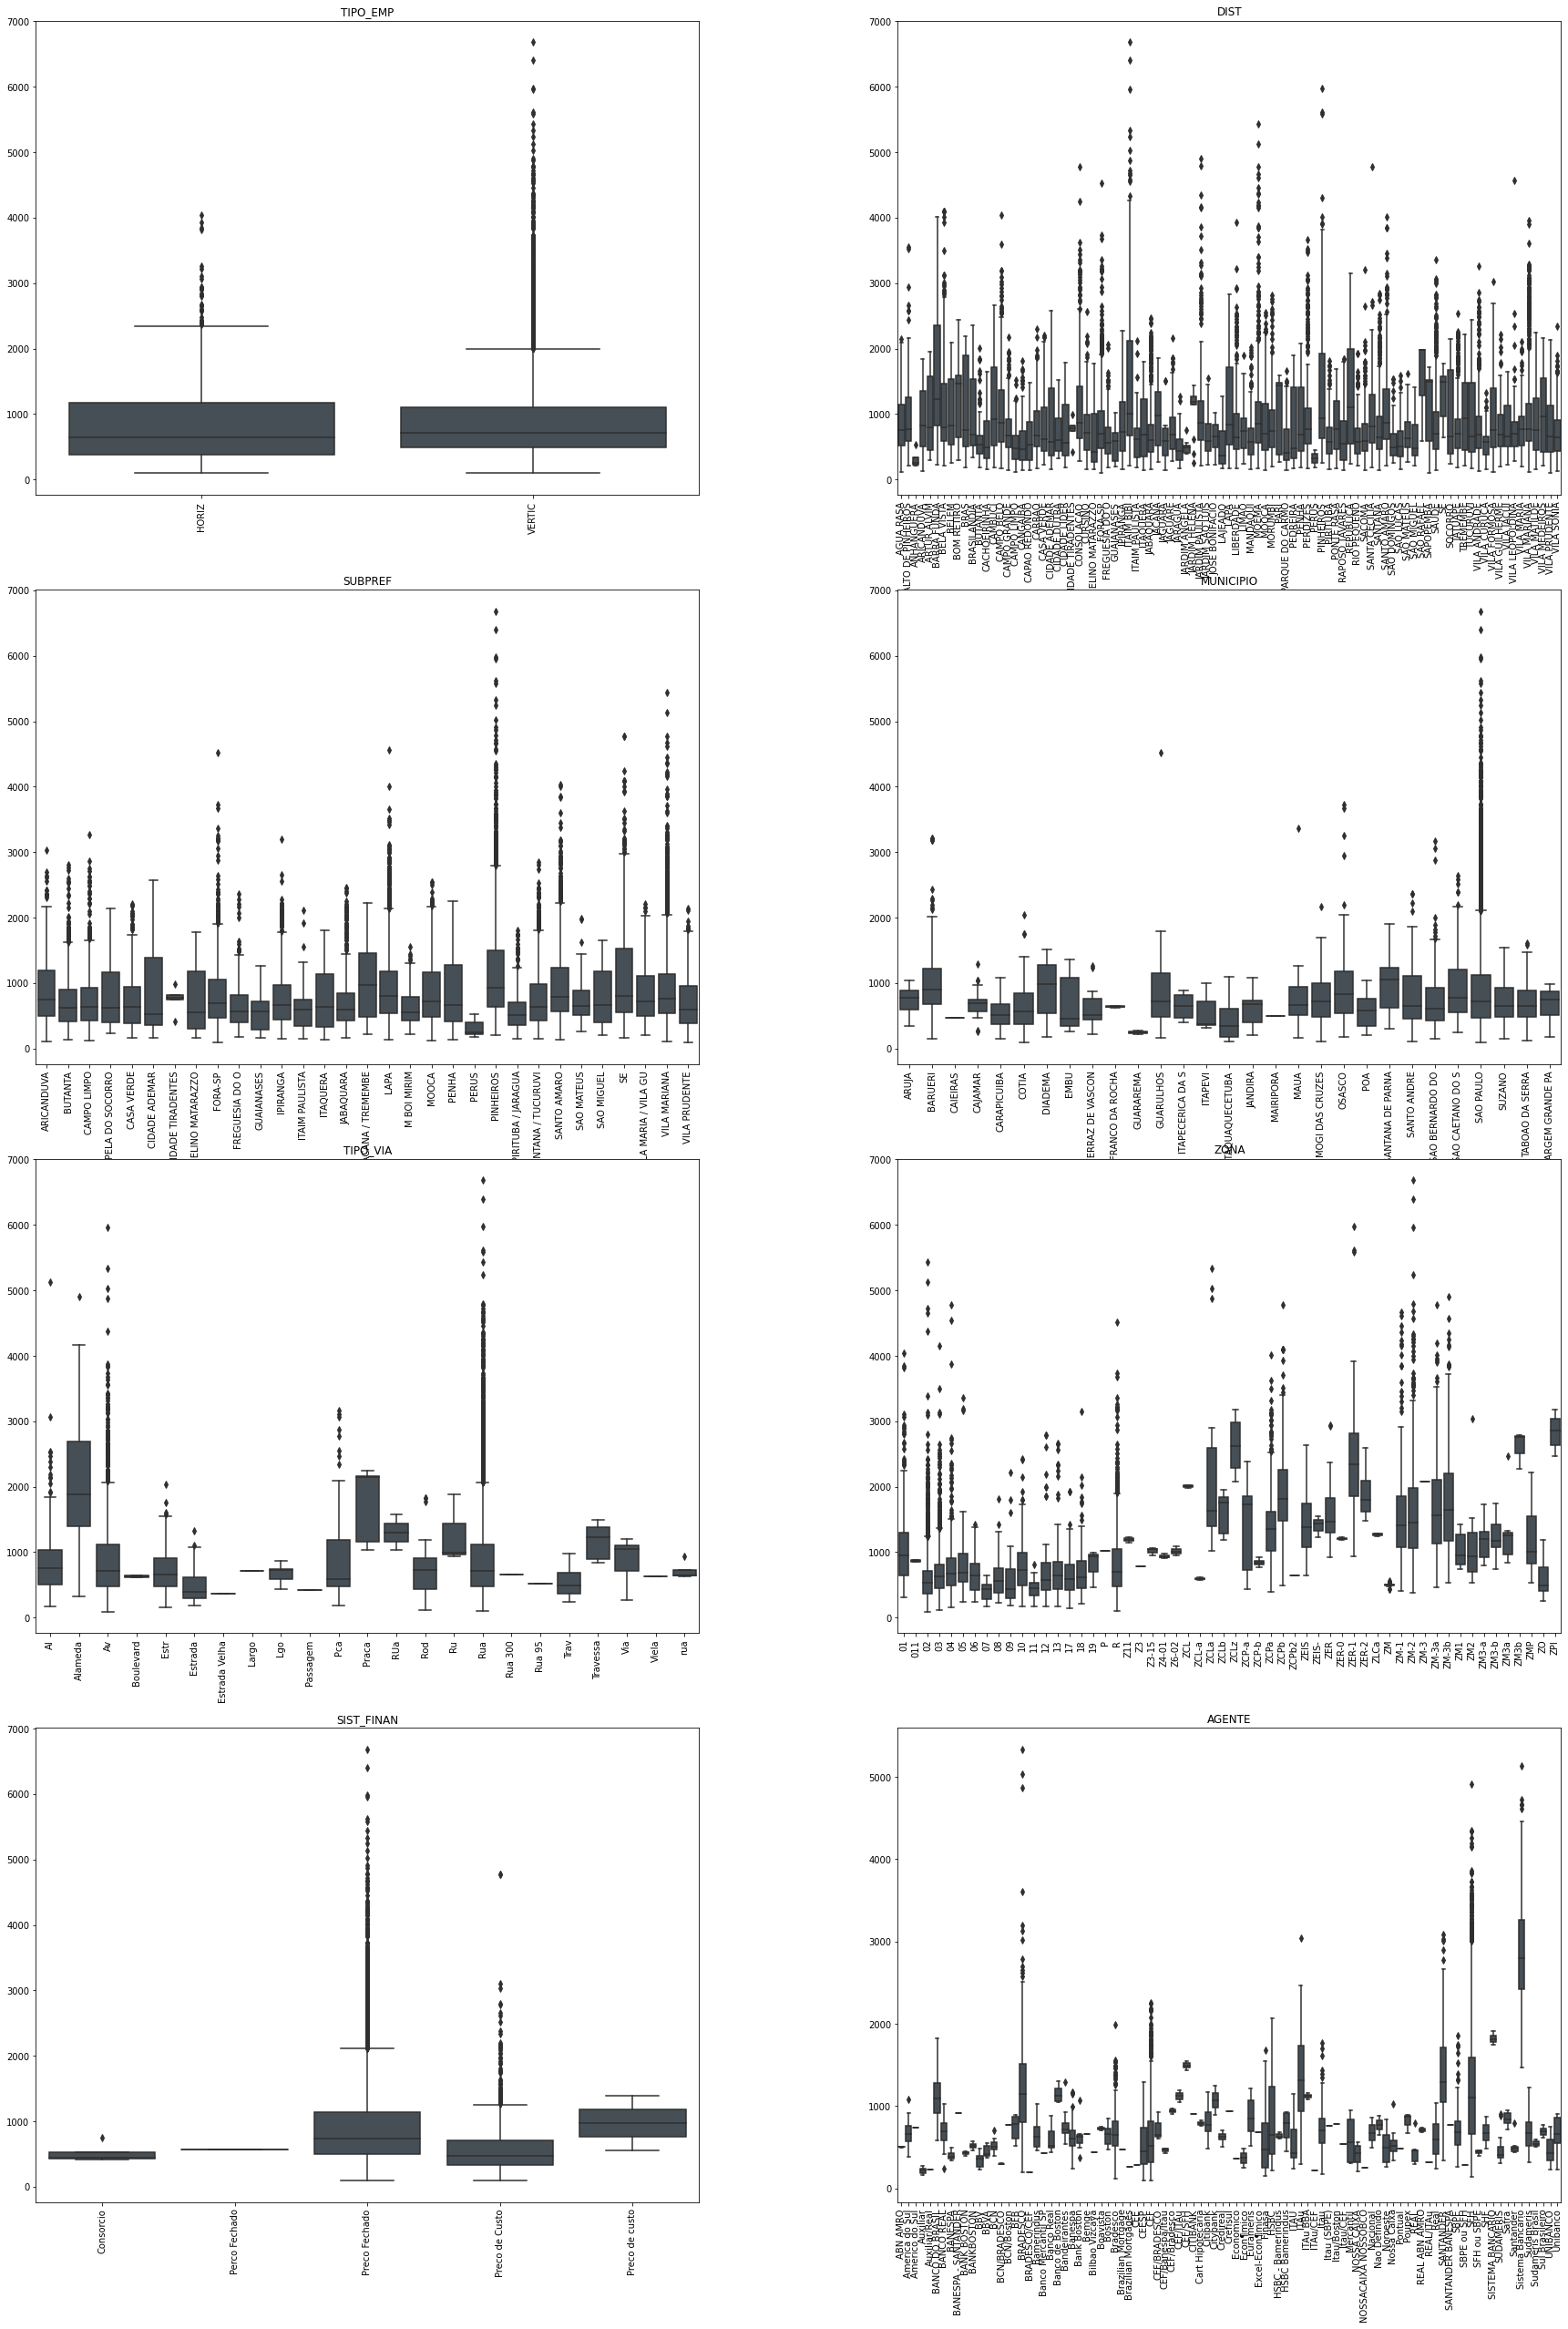

In [13]:
plot_violin_variaveis(dataframe=df, conjunto=v_categoricos, resposta=v_resposta)